# ML Algorithms 

**Datasets**: 

1)Iris

  https://archive.ics.uci.edu/ml/datasets/Iris

  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/ 


2)Diabetes

Default from sklearn-datasets learn

## Import


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Download Dataset Iris

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /ml/machine-learning-databases/iris</title>
 </head>
 <body>
<h1>Index of /ml/machine-learning-databases/iris</h1>
<ul><li><a href="/ml/machine-learning-databases/"> Parent Directory</a></li>
<li><a href="Index"> Index</a></li>
<li><a href="bezdekIris.data"> bezdekIris.data</a></li>
<li><a href="iris.data"> iris.data</a></li>
<li><a href="iris.names"> iris.names</a></li>
</ul>
<address>Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips SVN/1.7.14 Phusion_Passenger/4.0.53 mod_perl/2.0.11 Perl/v5.16.3 Server at archive.ics.uci.edu Port 443</address>
</body></html>


In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2023-04-07 01:45:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2023-04-07 01:45:26 (82.4 MB/s) - ‘iris.data’ saved [4551/4551]



In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

--2023-04-07 01:45:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [application/x-httpd-php]
Saving to: ‘iris.names’

iris.names          100%[===================>]   2.93K  --.-KB/s    in 0s      

2023-04-07 01:45:27 (75.9 MB/s) - ‘iris.names’ saved [2998/2998]



In [5]:
!cat iris.data | head -n 1

5.1,3.5,1.4,0.2,Iris-setosa


## Load Dataset Iris

In [ ]:
cols = ["slength", "swidth", "plength", "pwidth", "class"]

In [ ]:
df = pd.read_csv("iris.data", names=cols)

In [ ]:
df.head()

,slength,swidth,plength,pwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,slength,swidth,plength,pwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   slength  150 non-null    float64
 1   swidth   150 non-null    float64
 2   plength  150 non-null    float64
 3   pwidth   150 non-null    float64
 4   class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Preprocessing


In [ ]:
encoder = preprocessing.LabelEncoder()
df["class"] = encoder.fit_transform(df["class"])

In [ ]:
df["class"].unique()

array([0, 1, 2])

In [ ]:
X = df.iloc[:, :-1].values
Y = df["class"].values

## Load Dataset Diabetes 

In [10]:
data = datasets.load_diabetes()

In [11]:
len(data)

8

In [12]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [13]:
X, Y = datasets.load_diabetes(return_X_y=True)

## Train, Validation and Test Splits

In [20]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [21]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

## K Nearest Neighbours

### Imports

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Model

In [24]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [25]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
y_pred_knn = knn_model.predict(x_test)

In [28]:
y_test[0:5]

array([219.,  70., 202., 230., 111.])

In [29]:
y_pred_knn[0:5]

array([130.66666667, 194.66666667, 145.        , 239.        ,
       168.66666667])

### Result

In [33]:
print(knn_model.score(x_test, y_test))

0.36498737331014663


In [34]:
print(r2_score(y_pred_knn, y_test))

-0.27594790926025414


In [36]:
print(mean_squared_error(y_pred_knn, y_test)) # squared=False // For root_mean_squared_error

3364.3932584269664


In [38]:
print(mean_absolute_error(y_pred_knn, y_test))

44.198501872659186


## Naive Bayes


### Import

In [ ]:
from sklearn.naive_bayes import GaussianNB

### Model

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred_nb = nb_model.predict(x_test)

### Result

In [ ]:
print(accuracy_score(y_test, y_pred_nb))

1.0


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_test, y_pred_nb))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(nb_model.score(x_test, y_test))

1.0


## Support Vector Machine

### Import

In [ ]:
from sklearn.svm import SVC

### Model

In [ ]:
svm_model = SVC()

In [ ]:
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred_svm = svm_model.predict(x_test)

### Result

In [ ]:
print(accuracy_score(y_pred_svm, y_test))

1.0


In [ ]:
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_pred_svm, y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(svm_model.score(x_test, y_test))

1.0


## Logistic Regression


### Import

In [ ]:
from sklearn.linear_model import LogisticRegression

### Model

In [ ]:
log_reg_model = LogisticRegression()

In [ ]:
log_reg_model = log_reg_model.fit(x_train, y_train)

In [ ]:
y_pred_log_reg = log_reg_model.predict(x_test)

### Result

In [ ]:
print(accuracy_score(y_test, y_pred_log_reg))

1.0


In [ ]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_test, y_pred_log_reg))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(log_reg_model.score(x_test, y_test))

1.0


## Linear Regression

### Import

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Model

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model = lin_reg_model.fit(x_train, y_train)

In [ ]:
y_pred_lin_reg = lin_reg_model.predict(x_test)

### Result

In [ ]:
print(mean_absolute_error(y_pred_lin_reg, y_test))

42.79409467959994


In [ ]:
print(mean_squared_error(y_pred_lin_reg, y_test)) # squared=False // For root_mean_squared_error

2900.193628493482


In [ ]:
print(r2_score(y_pred_lin_reg, y_test))

0.00690491583216335


In [ ]:
print(lin_reg_model.score(x_test, y_test))

0.4526027629719195


### Plot

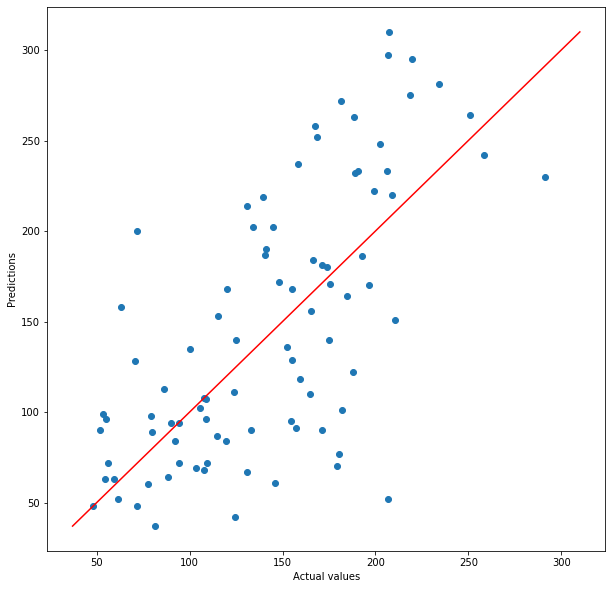

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_lin_reg, y_test)

plt.ylabel('Predictions')
plt.xlabel('Actual values')

p1 = max(max(y_pred_lin_reg), max(y_test))
p2 = min(min(y_pred_lin_reg), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.show()

## Decision Tree

### Import

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Entropy Model

In [ ]:
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

In [ ]:
dt_model = dt_model.fit(x_train, y_train)

In [ ]:
y_pred_dt = dt_model.predict(x_test)

### Tree

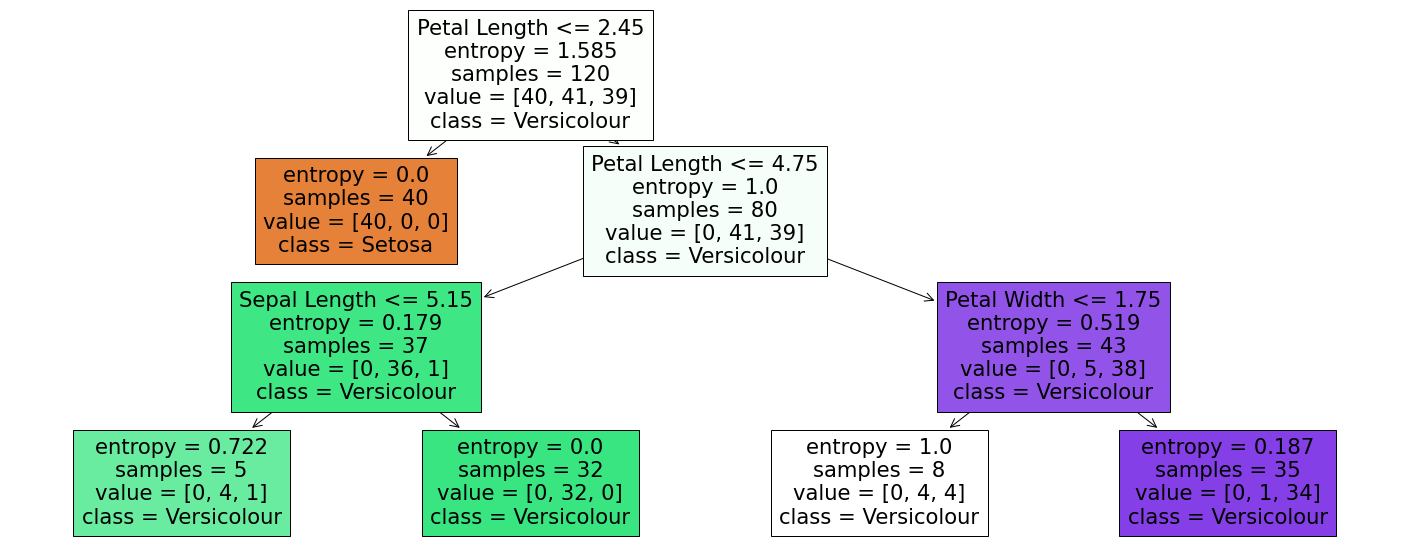

In [ ]:
plt.figure(figsize=(25,10))
plot = tree.plot_tree(dt_model,filled=True, feature_names=["Sepal Length","Sepal Width","Petal Length","Petal Width"],class_names=["Setosa","Versicolour","Versicolour"])

### Result

In [ ]:
print(accuracy_score(y_pred_dt, y_test))

1.0


In [ ]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_pred_dt, y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Random Forest

### Import

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

In [ ]:
rf_model = rf_model.fit(x_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

### Result

In [ ]:
print(accuracy_score(y_pred_rf, y_test))

1.0


In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_pred_rf, y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print(rf_model.score(x_test, y_test))

1.0


## Linear Discriminant Analysis

### Import

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

### Model

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
X_train = lda_model.fit_transform(x_train, y_train)

In [ ]:
X_test = lda_model.transform(x_test)

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred_lda_rf = rf_classifier.predict(X_test)

### Result

In [ ]:
print(accuracy_score(y_pred_lda_rf, y_test))

0.9666666666666667


In [ ]:
print(classification_report(y_pred_lda_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
print(confusion_matrix(y_pred_lda_rf, y_test))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [ ]:
print(rf_classifier.score(X_test, y_test))

0.9666666666666667
